In [2]:
# Imports
library(readr)
library(dplyr)
library(lubridate)
library(grf)
library(ggplot2)
library(tidyverse)
library(caret)
library(npsurv)
library(condSURV)
library(survival)
library(survminer)
library(ranger)
library(ggfortify)

theme_set(theme_bw())

In [3]:
sessionInfo()

R version 4.2.3 (2023-03-15)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.5 LTS

Matrix products: default
BLAS/LAPACK: /home/bvelasco/.conda/envs/R_base/lib/libopenblasp-r0.3.25.so

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] ggfortify_0.4.16 ranger_0.16.0    survminer_0.4.9  ggpubr_0.6.0    
 [5] survival_3.5-7   condSURV_2.0.4   npsurv_0.5-0     lsei_1.3-0      
 [9] caret_6.0-94     lattice_0.22-5   forcats_1.0.0    stringr_1.5.1   
[13] purrr_1.0.2      tidyr_1.3.0      tibble_3.2.1     tidyverse_2.0.0 
[17] ggplot2_3.4.4    grf_2.3.0        lubridate_1.9.2  dplyr_1.1.2     

In [18]:
# Read data
data <- read_csv('../racat_prep.csv', show_col_types = FALSE)

New names:
• `` -> `...1`


In [19]:
colnames(data)

[1] "...1"                      "nia"                      
 [3] "Nia_loc"                   "antibio1"                 
 [5] "dat_qx_x"                  "codisituaciopacient_new"  
 [7] "dat_situapac_newrac"       "dat_qx_y"                 
 [9] "diagR"                     "edat"                     
[11] "edat_g"                    "codisexe"                 
[13] "sex"                       "any_qx"                   
[15] "up"                        "upnom"                    
[17] "nivah"                     "nivah_nom"                
[19] "C_Ingres"                  "C_Ingres_nom"             
[21] "viscositat"                "Durada_intervencio_minuts"
[23] "smoking_date"              "smoking_value"            
[25] "bmi_date"                  "bmi_val"                  
[27] "Congestive_Heart_Failure"  "Cardiac_arrhytmias"       
[29] "Valvular_Disease"          "Peripheral_Vascular_dis"  
[31] "Altres_trastorns_neur"     "Rheumatoid_Arthritis"     
[33] "Fluid_and_Electrolyte"     "Alcohol_Abuse"            
[35] "Pulmonary_Circulation"     "Hipertension"             
[37] "MPOC"                      "Hypothyroidism"           
[39] "Peptic_Ulcer_Disease"      "Coagulopathy"             
[41] "Blood_Loss_Anemia"         "Drug_Abuse"               
[43] "Paralysis"                 "AIDS"                     
[45] "Obesitat"                  "Deficiency_Anemia"        
[47] "Psychoses"                 "Lymphoma"                 
[49] "Weight_Loss"               "Depressió"                
[51] "Hypertension_complicated"  "Acute_Myocardial"         
[53] "Cerebrovascular_d"         "Renal_d"                  
[55] "Dementia"                  "Mild_Liver_d"             
[57] "Cancer"                    "Diabetes"                 
[59] "Moderate_Severe_Liver_d"   "elix_cnt"                 
[61] "charlindex"                "Antibiotic"               
[63] "Ea"                        "Ei"                       
[65] "En"                        "Ed"                       
[67] "dat_defunc"                "T"

In [20]:
# Shuffle
data <- data[sample(nrow(data)),]

In [5]:
# Shuffle
data <- data[sample(nrow(data)*.1),]

In [6]:
########################### Helper functions ##########################################

In [21]:
# Encode cardinals
encode_ordinal <- function(x, order = unique(x)) {
  print(order)
  x <- as.numeric(factor(x, levels = order, exclude = NULL))
  x
}

In [22]:
data$nivah <- encode_ordinal(data$nivah)
data$viscositat <- encode_ordinal(data$viscositat)

[1] "X4"  "X3"  "X1"  "X2"  "X4a"
[1] "Mitja" "Alta"  "Baixa" "nc"   


In [13]:
data$nivah

[1] 1 1 2 3 1 4 1 1 3 1 3 3 4 1 2 3 3 4 4 2 2 1 4 3 1 3 1 3 3 1 2 4 3 4 1 3
   [37] 4 1 3 3 4 3 4 4 3 2 3 4 4 3 1 1 1 3 3 2 3 1 2 4 2 1 3 3 3 3 3 1 4 1 3 3
   [73] 1 2 4 1 3 2 3 3 1 1 4 3 3 1 1 3 1 3 2 4 4 1 2 1 1 2 3 1 1 2 2 3 3 3 1 2
  [109] 1 2 1 1 4 4 3 4 4 4 3 3 5 1 1 2 1 3 1 3 1 4 3 3 4 1 4 1 4 1 1 4 2 4 4 1
  [145] 1 3 3 1 1 4 1 3 1 3 3 2 3 4 1 3 1 4 3 3 1 3 3 4 3 1 1 1 2 4 4 4 1 4 4 2
  [181] 3 3 2 2 3 3 2 3 1 1 4 3 4 4 4 4 4 3 1 4 1 4 2 3 2 1 4 1 3 1 1 2 4 4 3 3
  [217] 4 2 2 1 3 3 2 4 3 1 3 3 4 4 1 1 2 1 4 3 4 1 3 1 3 1 2 3 4 3 3 2 1 3 3 4
  [253] 1 3 3 1 4 1 3 4 2 1 4 1 2 1 1 2 2 1 1 2 3 1 2 1 1 1 2 1 4 2 2 1 3 4 1 1
  [289] 1 3 3 1 1 4 2 3 3 4 1 4 2 2 1 4 2 5 2 3 4 2 4 3 3 1 1 3 4 4 2 5 3 4 3 1
  [325] 3 1 4 3 4 1 1 1 4 2 3 1 4 2 2 4 3 2 1 1 1 2 3 1 1 1 4 2 1 3 2 2 1 1 3 1
  [361] 2 1 4 3 2 1 4 4 3 4 4 1 2 1 1 2 1 1 1 1 4 1 4 3 2 3 1 1 4 1 4 3 2 4 1 4
  [397] 3 4 4 4 4 1 3 1 3 1 4 2 2 2 2 3 1 2 3 4 2 2 1 2 1 1 5 4 4 4 2 2 4 3 3 1
  [433] 3 3 3 3 2 4 1 1 1 1 3 3 4 4 1 4 3 3 3 1 1 1 1 1 2 4 1 3 3 4 4 2 4 2 2 2
  [469] 4 1 3 2 2 4 3 1 1 3 1 4 1 4 3 4 2 1 3 1 4 1 2 2 1 3 4 2 3 1 3 2 1 4 4 2
  [505] 3 3 2 1 2 1 1 3 5 2 2 3 3 4 2 4 3 1 3 3 4 2 3 3 2 2 1 4 1 2 4 3 1 1 4 3
  [541] 2 1 1 1 4 4 3 1 3 3 3 1 2 3 1 4 3 1 4 4 4 2 1 1 4 3 4 3 1 3 4 1 1 4 1 1
  [577] 3 3 4 3 1 1 2 3 1 4 3 4 1 1 4 4 1 3 2 3 3 5 3 3 3 4 4 4 1 3 1 2 2 3 1 3
  [613] 1 2 3 4 1 3 2 1 1 1 2 2 1 4 3 5 4 1 1 2 2 3 1 3 1 3 2 3 4 1 3 3 4 3 4 4
  [649] 3 1 3 2 1 1 1 2 5 2 1 2 2 5 2 1 2 1 1 3 1 1 2 5 1 4 2 2 1 3 2 3 1 2 3 1
  [685] 1 2 3 2 3 1 2 1 4 4 3 4 1 3 3 1 2 1 1 1 1 1 2 2 4 3 3 3 3 4 1 1 4 1 1 2
  [721] 1 4 1 1 4 1 3 4 4 4 4 1 3 3 4 2 4 3 3 2 1 2 1 4 1 3 4 2 1 4 4 3 2 1 1 3
  [757] 1 2 4 2 4 4 5 3 2 1 1 3 1 1 1 2 1 1 3 4 1 4 1 1 3 3 1 3 1 3 3 2 3 1 3 3
  [793] 3 2 3 3 2 2 3 3 1 2 1 4 1 3 1 1 1 1 1 3 2 1 3 3 4 3 1 4 4 4 1 2 3 2 1 4
  [829] 1 3 3 1 1 1 3 1 4 3 2 2 3 1 1 1 1 4 1 3 2 2 2 2 3 2 3 1 4 4 3 1 3 1 2 1
  [865] 4 4 1 1 3 4 4 5 3 3 3 3 2 1 3 3 3 1 1 4 4 3 1 5 2 1 3 3 1 4 1 4 3 1 3 3
  [901] 3 2 4 1 4 1 4 3 1 2 2 3 2 4 4 4 4 1 3 3 5 4 1 2 3 3 1 3 1 1 1 3 3 3 3 2
  [937] 3 1 3 4 3 1 4 3 1 1 3 3 1 4 2 4 3 1 2 1 3 3 3 4 4 4 4 3 1 2 2 2 3 2 4 1
  [973] 3 1 3 3 3 2 4 2 4 3 3 4 1 1 3 4 1 3 1 1 4 1 1 3 3 4 3 4 2 3 3 4 1 5 2 4
 [1009] 1 2 2 3 3 3 1 2 2 3 3 1 1 1 2 3 3 2 3 1 1 4 2 3 1 2 2 4 1 4 3 2 1 1 1 3
 [1045] 4 2 3 4 2 5 2 4 2 4 2 1 4 3 1 2 4 1 4 1 3 3 2 4 4 2 3 3 1 3 2 3 1 1 2 1
 [1081] 1 1 3 1 1 2 4 2 3 2 4 3 4 2 1 4 4 2 2 1 2 3 3 2 5 1 1 4 1 3 3 3 4 1 3 3
 [1117] 1 1 4 1 4 1 1 1 4 3 1 3 5 4 1 3 2 3 4 1 3 1 4 2 3 5 3 3 3 3 2 3 1 3 3 2
 [1153] 2 1 1 1 2 3 2 4 4 1 1 4 1 4 1 3 3 1 4 1 3 1 3 3 1 1 3 1 3 2 3 1 2 4 3 3
 [1189] 2 3 1 3 3 1 3 4 1 1 3 2 4 1 1 2 1 1 1 4 1 2 1 1 2 1 2 1 1 3 3 3 1 1 1 3
 [1225] 1 1 3 3 4 3 4 2 3 4 3 1 1 3 4 3 1 4 3 3 1 4 3 1 1 4 3 4 3 2 4 3 2 4 2 3
 [1261] 1 1 3 1 1 2 1 2 4 1 3 4 1 3 4 3 3 3 3 2 3 1 4 4 4 3 1 4 3 1 2 4 1 3 1 4
 [1297] 4 4 4 1 1 1 1 1 2 1 3 3 2 3 1 1 1 2 1 3 1 3 3 4 2 3 1 1 3 2 1 1 4 3 3 3
 [1333] 2 3 3 4 2 1 4 3 2 1 2 1 1 4 2 4 1 3 3 1 1 3 4 4 2 2 2 4 2 2 3 3 4 1 3 4
 [1369] 2 3 1 2 2 3 5 1 2 4 3 3 5 4 3 3 4 3 2 3 3 4 1 3 3 4 2 1 4 4 3 2 2 1 3 4
 [1405] 3 4 3 4 3 4 3 4 2 2 1 2 1 3 4 1 4 5 3 5 3 3 1 1 3 3 3 4 3 4 3 3 1 1 2 2
 [1441] 5 1 4 1 3 2 3 3 1 2 3 1 1 1 1 3 1 3 3 1 1 4 3 2 3 1 3 1 1 1 3 2 3 4 3 3
 [1477] 3 2 3 3 4 3 3 1 1 3 3 4 1 1 1 3 4 4 1 2 1 3 3 3 2 1 1 3 3 1 3 4 4 1 1 2
 [1513] 2 2 3 2 1 3 1 2 3 1 4 4 1 2 3 3 1 1 2 3 3 3 2 1 1 1 4 3 2 1 1 3 1 3 4 2
 [1549] 2 3 1 1 3 3 3 3 1 2 4 1 4 2 4 3 1 3 3 1 2 3 2 1 3 4 3 3 3 2 4 3 2 3 3 2
 [1585] 1 4 2 4 2 1 2 1 3 3 4 4 1 1 2 1 1 1 1 1 1 2 3 1 4 3 3 2 4 2 4 1 2 1 3 1
 [1621] 4 2 1 1 1 3 2 1 2 1 1 2 4 4 3 3 1 4 1 2 1 2 1 1 1 1 5 3 1 1 2 2 1 4 1 3
 [1657] 3 4 3 2 4 4 1 1 1 3 2 1 4 3 1 3 2 2 3 3 4 2 2 2 1 1 4 2 1 3 4 3 2 1 2 4
 [1693] 1 1 1 1 4 1 3 3 1 1 3 1 4 1 4 1 3 3 1 4 3 1 2 2 4 1 3 1 1 2 2 4 4 2 3 1
 [1729] 2 3 4 4 1 3 4 3 1 2 1 1 1 4 4 1 3 1 4 2 4 2 3 4 4 2 2 2 3 2 1 2 1 1 4 4
 [1765] 1 5 1 2 3 3 1 1 2 1 3 3 5 4 1 3 3 3 4 2 3 1 4 4 4 4 3 3 1 1 1 4 3 4 3 1
 [18

In [9]:
############################## Causal Survival Forest ##########################

In [10]:
covariates <- data[c("edat", "any_qx", "bmi_val", "charlindex", "codisexe", "nivah", "Diabetes", "Obesitat", "Rheumatoid_Arthritis", "smoking_value", "Durada_intervencio_minuts", "viscositat", "Alcohol_Abuse")]

In [11]:
any(is.na(covariates))

[1] FALSE

In [12]:
## Consider changing Age group and Hospital level to factors one-vs-all!

In [13]:
covariates <- covariates %>% mutate_all(as.numeric)
event_time <- data$T
treatment <- data$Antibiotic

In [14]:
cor(cov(covariates))

,edat,any_qx,bmi_val,charlindex,codisexe,nivah,Diabetes,Obesitat,Rheumatoid_Arthritis,smoking_value,Durada_intervencio_minuts,viscositat,Alcohol_Abuse
edat,1.00000000,-0.025773550,-0.49141061,0.08963895,0.45717857,-0.13164037,-0.23036724,-0.564502831,-0.70214794,-0.89400340,-0.12320410,-0.15159576,-0.95697443
any_qx,-0.02577355,1.000000000,-0.09634280,-0.24942409,0.32972041,0.48171746,0.03932334,-0.003375792,0.18668543,0.27016591,-0.54809089,0.52581549,0.07653641
bmi_val,-0.49141061,-0.096342803,1.00000000,-0.02205085,0.04543712,-0.02482589,0.48076961,0.980829733,-0.02869648,0.29643452,0.09671777,-0.11420908,0.49655984
charlindex,0.08963895,-0.249424094,-0.02205085,1.00000000,-0.45191040,-0.60342321,0.56094552,-0.046098814,-0.13335879,-0.08153285,0.52234803,-0.39162199,0.10889419
codisexe,0.45717857,0.329720412,0.04543712,-0.45191040,1.00000000,0.62490283,0.05611700,0.037816016,-0.15464215,-0.44468834,-0.82121299,0.03874550,-0.59127843
nivah,-0.13164037,0.481717460,-0.02482589,-0.60342321,0.62490283,1.00000000,-0.01839700,0.024571933,0.47321903,0.19745539,-0.90095452,0.47603760,-0.05212422
Diabetes,-0.23036724,0.039323338,0.48076961,0.56094552,0.05611700,-0.01839700,1.00000000,0.493676862,0.10319385,0.18913226,-0.07479795,-0.32150544,0.29227587
Obesitat,-0.56450283,-0.003375792,0.98082973,-0.04609881,0.03781602,0.02457193,0.49367686,1.000000000,0.05932020,0.39122271,0.04077721,-0.09288967,0.56753185
Rheumatoid_Arthritis,-0.70214794,0.186685428,-0.02869648,-0.13335879,-0.15464215,0.47321903,0.10319385,0.059320198,1.00000000,0.69357442,-0.30701007,0.19173674,0.58822389
smoking_value,-0.89400340,0.270165912,0.29643452,-0.08153285,-0.44468834,0.19745539,0.18913226,0.391222712,0.69357442,1.00000000,-0.01086273,0.22536972,0.89240454


In [15]:
eti <- 'Ei'
event_type <- data %>% pull(eti) 

In [16]:
Y=event_time
W=treatment
D=event_type

In [17]:
table(D)

D
   0    1 
2216   62 

In [18]:
table(W)

W
   0    1 
 923 1355 

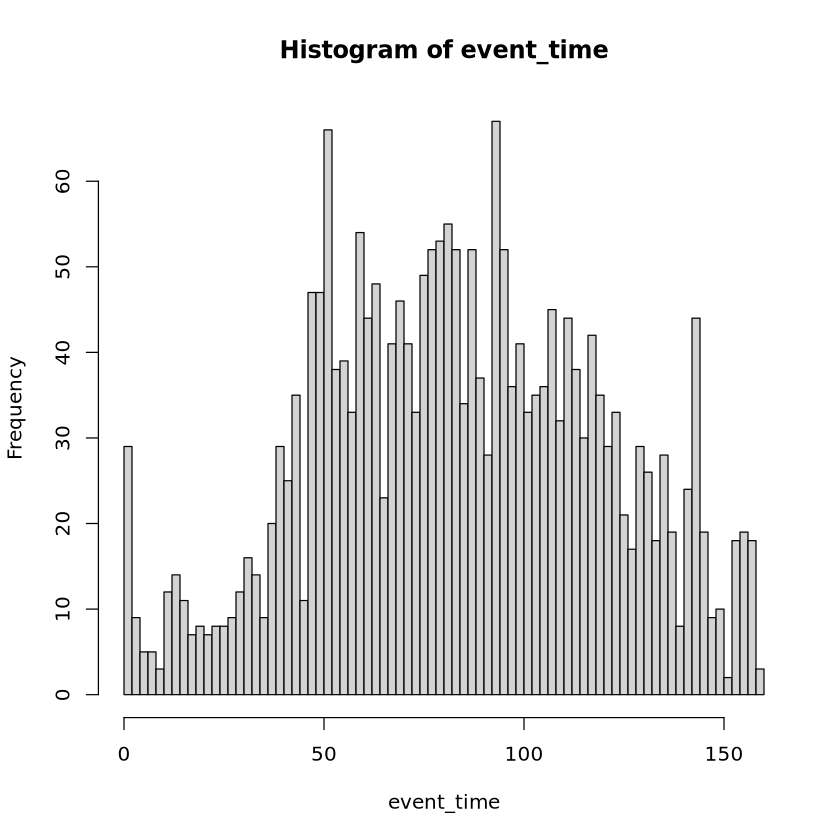

In [19]:
hist(event_time, breaks=100)

In [20]:
T_D = event_time*D

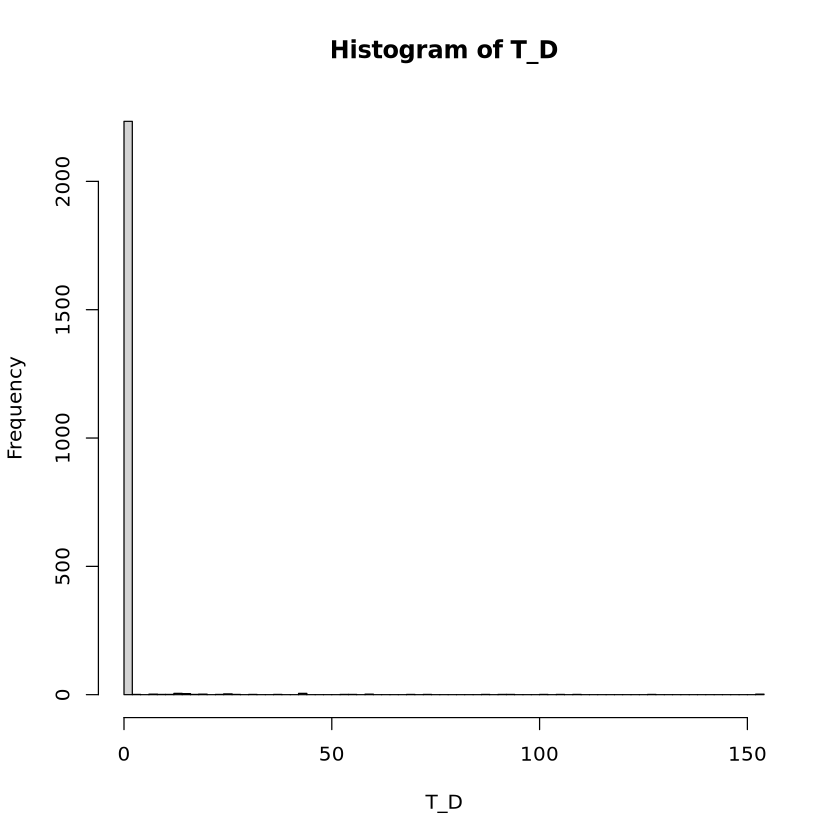

In [21]:
hist(T_D, breaks=100)

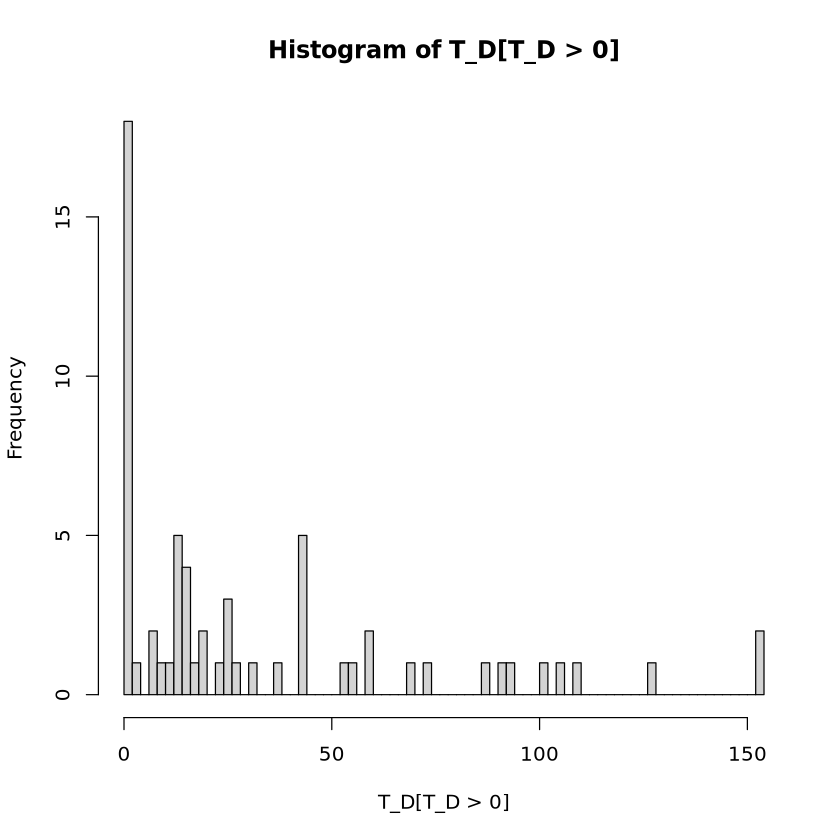

In [22]:
hist(T_D[T_D>0], breaks=100)

In [23]:
T_hist_C = data[c("T",eti)]
T_hist_C[,eti] <- lapply(T_hist_C[,eti], as.character)

p <- T_hist_C %>%
  ggplot( aes_string(x="T", fill=eti)) +
    geom_histogram( color="#e9ecef", alpha=0.6, position = 'identity', bins = 120) +
    scale_fill_manual(values=c("#69b3a2", "#404080")) +
    labs(fill="") + 
    ggtitle("'Histogram of event_time (Y) for the classes of D (censored/observed)'")

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


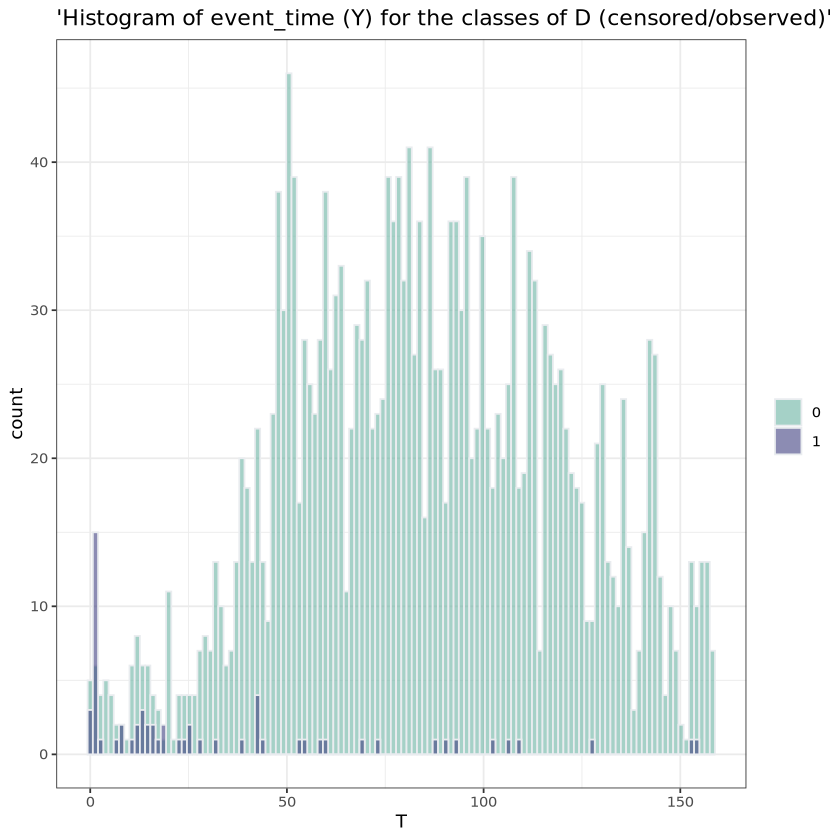

In [24]:
p

In [25]:
table(round(event_time[event_type==1],0))


  0   1   2   6   7   9  11  12  13  14  15  18  19  23  25  26  27  32  38  42 
  1  14   4   1   1   1   1   2   1   4   2   1   2   1   2   1   1   1   1   2 
 43  44  54  59  69  73  88  91  93 102 106 110 127 153 154 
  2   1   2   2   1   1   1   1   1   1   1   1   1   1   1 

In [26]:
############################# GRF package functions loaded ####################################

In [27]:
############################## Standard, fixed horizon calculation ###############################

In [32]:
horizon <- 120
failure.time <- seq(0, horizon, length.out = horizon)

# tau(X) = P[T(1) > horizon | X = x] - P[T(0) > horizon | X = x]
cs.forest <- causal_survival_forest(X=covariates, Y=round(event_time,0), W=treatment, 
                                          D=event_type, target="survival.probability", # "RMST" "survival.probability"
                                          failure.times=round(failure.time,0), horizon=horizon, censoring_model='forest',
                                          mtry=3)

c_y_hat <- cs.forest[["C.Y.hat"]]

In [33]:
# Borja's change: plot histogram of censoring probabilities    
p <- data.frame(c_y_hat) %>%
    ggplot( aes(x=c_y_hat)) +
      geom_histogram( color="#e9ecef", alpha=0.6, position = 'identity', bins = 40) +
      scale_fill_manual(values=c("#69b3a2", "#404080")) +
      labs(fill="") + 
      ggtitle("Histogram of censoring survival")

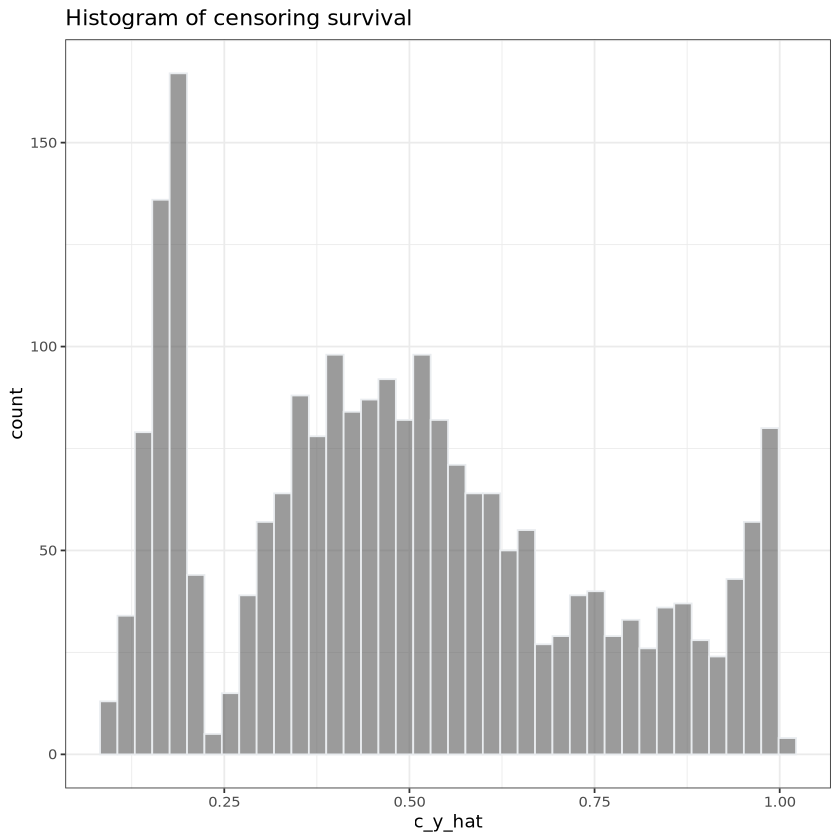

In [34]:
p

In [35]:
average_treatment_effect(cs.forest)

estimate     std.err 
0.012955211 0.009308421

In [36]:
attributes(cs.forest)

$names
 [1] "_ci_group_size"           "_num_variables"          
 [3] "_num_trees"               "_root_nodes"             
 [5] "_child_nodes"             "_leaf_samples"           
 [7] "_split_vars"              "_split_values"           
 [9] "_drawn_samples"           "_send_missing_left"      
[11] "_pv_values"               "_pv_num_types"           
[13] "predictions"              "variance.estimates"      
[15] "debiased.error"           "excess.error"            
[17] "seed"                     "_psi"                    
[19] "X.orig"                   "Y.orig"                  
[21] "W.orig"                   "D.orig"                  
[23] "Y.hat"                    "W.hat"                   
[25] "clusters"                 "equalize.cluster.weights"
[27] "has.missing.values"       "target"                  
[29] "horizon"                  "C.Y.hat"                 

$class
[1] "causal_survival_forest" "grf"

In [37]:
cs.forest

GRF forest object of type causal_survival_forest 
Number of trees: 2000 
Number of training samples: 2278 
Variable importance: 
    1     2     3     4     5     6     7     8     9    10    11    12    13 
0.215 0.117 0.193 0.088 0.081 0.134 0.005 0.002 0.000 0.003 0.102 0.061 0.000 

In [38]:
cs.pred <- predict(cs.forest, covariates)

In [39]:
cs.pred

predictions
<dbl>
0.0080135123
-0.0142022324
0.0151780018
0.0135846556
0.0074390108
0.0476958368
-0.0036252663
0.0446399324
0.0147135269


In [40]:
############################### Varying horizon calculation ################################

In [41]:
horizon_end <- 15
horizon_vec <- seq(5, horizon_end, length.out=(horizon_end-5)*2)
ate <- c()
ate_std <- c()
index <- c()

for (i in 1:length(horizon_vec)){
  
  horizon <- horizon_vec[i]
  failure.time <- seq(0, horizon, length.out = horizon)
  # tau(X) = P[T(1) > horizon | X = x] - P[T(0) > horizon | X = x]
  cs.forest <- causal_survival_forest(X=covariates, Y=round(event_time,0), W=treatment, 
                                          D=event_type, target="survival.probability", # "RMST" "survival.probability"
                                          failure.times=round(failure.time,0), horizon=horizon, censoring_model='forest2',
                                          mtry=2)

  ate_i <- average_treatment_effect(cs.forest)
  ate<-c(ate, ate_i[[1]])
  ate_std<-c(ate_std, ate_i[[2]])
  index<-c(index, horizon)
  
  print(paste0("time: ", round(horizon, 2), ", ate: ", round(ate_i[[1]],4)))
}


[1] "time: 5, ate: -0.0034"
[1] "time: 5.53, ate: -0.0046"
[1] "time: 6.05, ate: -0.0033"
[1] "time: 6.58, ate: -0.0043"
[1] "time: 7.11, ate: -0.0033"
[1] "time: 7.63, ate: -0.0048"
[1] "time: 8.16, ate: -0.0046"
[1] "time: 8.68, ate: -0.0056"
[1] "time: 9.21, ate: -0.0043"
[1] "time: 9.74, ate: -0.0056"
[1] "time: 10.26, ate: -0.0028"
[1] "time: 10.79, ate: -0.0044"
[1] "time: 11.32, ate: -0.0026"
[1] "time: 11.84, ate: -0.0042"
[1] "time: 12.37, ate: -0.0015"
[1] "time: 12.89, ate: -0.0026"
[1] "time: 13.42, ate: -0.0016"
[1] "time: 13.95, ate: -0.0026"
[1] "time: 14.47, ate: -0.0024"
[1] "time: 15, ate: -0.0015"


In [42]:
ate_vector<-cbind(index,ate,ate_std)

In [43]:
ate_vector

index,ate,ate_std
5.000000,-0.003376984,0.003960401
5.526316,-0.004587691,0.003947921
6.052632,-0.003313477,0.004211165
6.578947,-0.004304766,0.004332992
7.105263,-0.003289034,0.004282545
7.631579,-0.004812464,0.004165433
8.157895,-0.004646789,0.004249996
8.684211,-0.005597722,0.004286014
9.210526,-0.004334738,0.004366388
9.736842,-0.005550214,0.004392752


Saving 6.67 x 6.67 in image


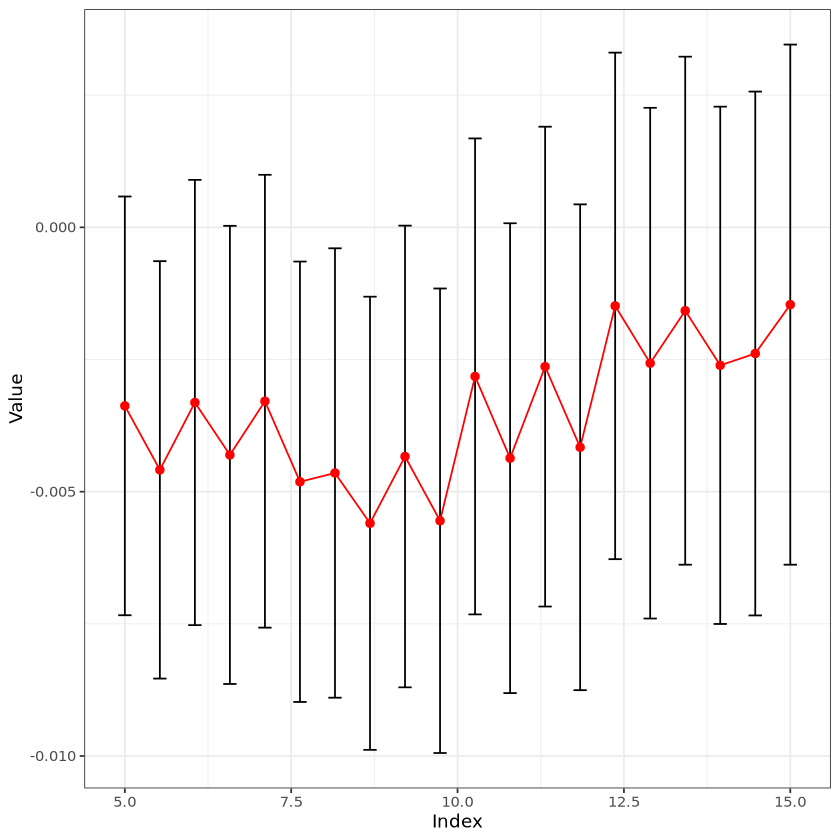

In [44]:
ggplot(ate_vector, aes(x = index, y = ate)) +
  geom_errorbar(aes(ymin = ate - ate_std, ymax = ate + ate_std), width = 0.2) +
  geom_line(colour = "red") +
  geom_point(colour = "red", size = 2) +
  labs(x = "Index", y = "Value")

ggsave("ate_vect.pdf")

In [45]:
########################## CATE of varying covariates #################################

In [28]:
horizon <- 120
failure.time <- seq(0, horizon, length.out = horizon)

# tau(X) = P[T(1) > horizon | X = x] - P[T(0) > horizon | X = x]
cs.forest <- causal_survival_forest(X=covariates, Y=round(event_time,0), W=treatment, 
                                          D=event_type, target="survival.probability", # "RMST" "survival.probability"
                                          failure.times=round(failure.time,0), horizon=horizon, censoring_model='forest2',
                                          mtry=2)

c_y_hat <- cs.forest[["C.Y.hat"]]

In [29]:
cs.forest

GRF forest object of type causal_survival_forest 
Number of trees: 2000 
Number of training samples: 2278 
Variable importance: 
    1     2     3     4     5     6     7     8     9    10    11    12    13 
0.182 0.146 0.216 0.071 0.065 0.131 0.004 0.003 0.000 0.005 0.117 0.060 0.000 

In [30]:
covariates

edat,any_qx,bmi_val,charlindex,codisexe,nivah,Diabetes,Obesitat,Rheumatoid_Arthritis,smoking_value,Durada_intervencio_minuts,viscositat,Alcohol_Abuse
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
71.11294,2012,25.51000,1,0,1,0,0,0,1,89.91211,1,0
75.30185,2018,26.17000,1,0,2,0,0,0,2,89.91211,2,0
63.18686,2016,33.52000,0,1,3,0,0,0,0,89.91211,1,0
70.66940,2011,32.27489,1,1,3,0,0,1,0,89.91211,3,0
78.78987,2020,26.52000,0,1,2,0,0,0,0,89.91211,2,0
79.32922,2019,40.32000,0,1,1,0,0,0,0,89.91211,3,0
74.62286,2015,26.51000,0,0,4,0,0,0,0,69.00000,2,0
58.17659,2020,36.80000,0,1,2,0,0,0,2,45.00000,2,0
78.60096,2016,32.46000,0,1,3,0,1,0,0,90.00000,3,0


In [31]:
######################## AGE ######################

In [32]:
medians <- apply(covariates, 2, median)

In [33]:
covar_vector <- seq(50, 90, length.out=1+(90-50))
ate <- c()
ate_std <- c()
index <- c()

for (i in 1:length(covar_vector)){
  
  covar_value <- covar_vector[i]
  
  # tau(X) = P[T(1) > horizon | X = x] - P[T(0) > horizon | X = x]
  medians['edat']<-covar_value
  ate_value <- predict(cs.forest, t(as.data.frame(medians)), estimate.variance = TRUE)
  
  ate<-c(ate, ate_value[[1]])
  ate_std<-c(ate_std, ate_value[[2]])
  index<-c(index, covar_value)
  
  print(paste0("Age: ", round(covar_value, 2), ", ate: ", round(ate_value[[1]],4)))
  
}


[1] "Age: 50, ate: 0.0215"
[1] "Age: 51, ate: 0.0215"
[1] "Age: 52, ate: 0.0215"
[1] "Age: 53, ate: 0.0215"
[1] "Age: 54, ate: 0.0215"
[1] "Age: 55, ate: 0.0215"
[1] "Age: 56, ate: 0.0215"
[1] "Age: 57, ate: 0.0215"
[1] "Age: 58, ate: 0.0213"
[1] "Age: 59, ate: 0.0213"
[1] "Age: 60, ate: 0.0213"
[1] "Age: 61, ate: 0.0211"
[1] "Age: 62, ate: 0.0209"
[1] "Age: 63, ate: 0.0209"
[1] "Age: 64, ate: 0.0207"
[1] "Age: 65, ate: 0.0206"
[1] "Age: 66, ate: 0.0207"
[1] "Age: 67, ate: 0.0207"
[1] "Age: 68, ate: 0.0207"
[1] "Age: 69, ate: 0.0209"
[1] "Age: 70, ate: 0.021"
[1] "Age: 71, ate: 0.0206"
[1] "Age: 72, ate: 0.02"
[1] "Age: 73, ate: 0.0197"
[1] "Age: 74, ate: 0.0196"
[1] "Age: 75, ate: 0.0199"
[1] "Age: 76, ate: 0.0201"
[1] "Age: 77, ate: 0.0202"
[1] "Age: 78, ate: 0.0196"
[1] "Age: 79, ate: 0.0193"
[1] "Age: 80, ate: 0.0192"
[1] "Age: 81, ate: 0.0191"
[1] "Age: 82, ate: 0.0194"
[1] "Age: 83, ate: 0.0195"
[1] "Age: 84, ate: 0.0196"
[1] "Age: 85, ate: 0.0196"
[1] "Age: 86, ate: 0.0196"
[1] 

In [34]:
ate_vector_age<-cbind(index,ate,ate_std)
# Save matrix of ates and sds
#write.csv(ate_vector, "ate_matrix.csv")


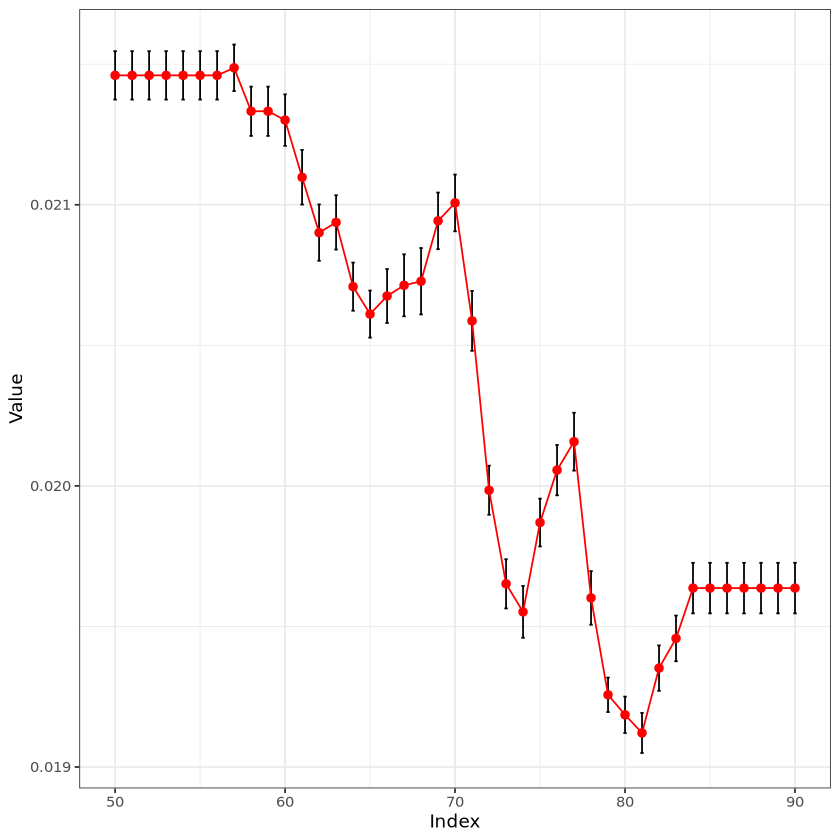

In [35]:
ggplot(ate_vector_age, aes(x = index, y = ate)) +
  geom_errorbar(aes(ymin = ate - ate_std, ymax = ate + ate_std), width = 0.2) +
  geom_line(colour = "red") +
  geom_point(colour = "red", size = 2) +
  labs(x = "Index", y = "Value")
  #ggsave("ate_vect_age.pdf")


In [36]:
###################### Charlson #############################

In [37]:
medians <- apply(covariates, 2, median)

In [38]:
covar_vector <- seq(1, 10, length.out=1+(9-1))
ate <- c()
ate_std <- c()
index <- c()

for (i in 1:length(covar_vector)){
  
  covar_value <- covar_vector[i]
  
  # tau(X) = P[T(1) > horizon | X = x] - P[T(0) > horizon | X = x]
  medians['charlindex']<-covar_value
  ate_value <- predict(cs.forest, t(as.data.frame(medians)), estimate.variance = TRUE)
  
  ate<-c(ate, ate_value[[1]])
  ate_std<-c(ate_std, ate_value[[2]])
  index<-c(index, covar_value)
  
  print(paste0("Charlson: ", round(covar_value, 2), ", ate: ", round(ate_value[[1]],4)))
  
}


[1] "Charlson: 1, ate: 0.0188"
[1] "Charlson: 2.12, ate: 0.0186"
[1] "Charlson: 3.25, ate: 0.0186"
[1] "Charlson: 4.38, ate: 0.0186"
[1] "Charlson: 5.5, ate: 0.0186"
[1] "Charlson: 6.62, ate: 0.0186"
[1] "Charlson: 7.75, ate: 0.0186"
[1] "Charlson: 8.88, ate: 0.0186"
[1] "Charlson: 10, ate: 0.0186"


In [39]:
ate_vector_charlson<-cbind(index,ate,ate_std)
# Save matrix of ates and sds
#write.csv(ate_vector, "ate_matrix.csv")


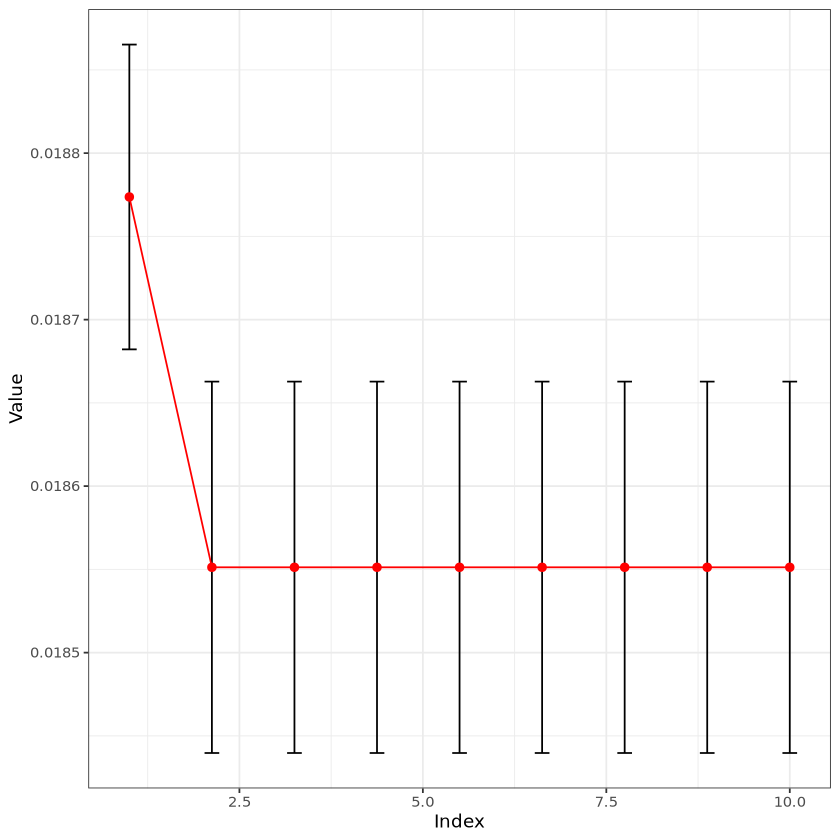

In [40]:
ggplot(ate_vector_charlson, aes(x = index, y = ate)) +
  geom_errorbar(aes(ymin = ate - ate_std, ymax = ate + ate_std), width = 0.2) +
  geom_line(colour = "red") +
  geom_point(colour = "red", size = 2) +
  labs(x = "Index", y = "Value")
  #ggsave("ate_vect_charlson.pdf")


In [41]:
###################### BMI #############################

In [42]:
medians <- apply(covariates, 2, median)

In [43]:
covar_vector <- seq(15, 60, length.out=1+(60-15))
ate <- c()
ate_std <- c()
index <- c()

for (i in 1:length(covar_vector)){
  
  covar_value <- covar_vector[i]
  
  # tau(X) = P[T(1) > horizon | X = x] - P[T(0) > horizon | X = x]
  medians['bmi']<-covar_value
  ate_value <- predict(cs.forest, t(as.data.frame(medians)), estimate.variance = TRUE)
  
  ate<-c(ate, ate_value[[1]])
  ate_std<-c(ate_std, ate_value[[2]])
  index<-c(index, covar_value)
  
  print(paste0("BMI: ", round(covar_value, 2), ", ate: ", round(ate_value[[1]],4)))
  
}


ERROR: Error in validate_newdata(newdata, X, allow.na = TRUE): newdata must have the same number of columns as the training matrix.


In [62]:
ate_vector_bmi<-cbind(index,ate,ate_std)
# Save matrix of ates and sds
#write.csv(ate_vector, "ate_matrix.csv")


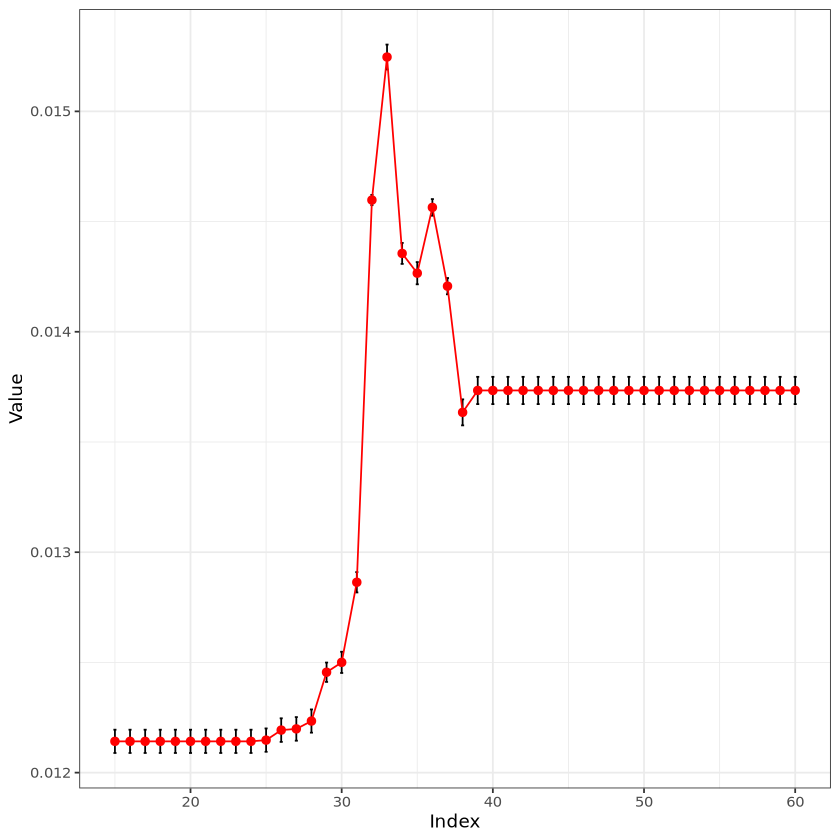

In [63]:
ggplot(ate_vector_bmi, aes(x = index, y = ate)) +
  geom_errorbar(aes(ymin = ate - ate_std, ymax = ate + ate_std), width = 0.2) +
  geom_line(colour = "red") +
  geom_point(colour = "red", size = 2) +
  labs(x = "Index", y = "Value")
  #ggsave("ate_vect_bmi.pdf")


In [ ]:
###################### Hospital level #############################

In [66]:
medians <- apply(covariates, 2, median)

In [67]:
covar_vector <- seq(1, 5, length.out=1+(5-1))
ate <- c()
ate_std <- c()
index <- c()

for (i in 1:length(covar_vector)){
  
  covar_value <- covar_vector[i]
  
  # tau(X) = P[T(1) > horizon | X = x] - P[T(0) > horizon | X = x]
  medians['Hospital_level']<-covar_value
  ate_value <- predict(cs.forest, t(as.data.frame(medians)), estimate.variance = TRUE)
  
  ate<-c(ate, ate_value[[1]])
  ate_std<-c(ate_std, ate_value[[2]])
  index<-c(index, covar_value)
  
  print(paste0("Hospital_level: ", round(covar_value, 2), ", ate: ", round(ate_value[[1]],4)))
  
}


[1] "Hospital_level: 1, ate: 0.0146"
[1] "Hospital_level: 2, ate: 0.0146"
[1] "Hospital_level: 3, ate: 0.0146"
[1] "Hospital_level: 4, ate: 0.0157"
[1] "Hospital_level: 5, ate: 0.0157"


In [68]:
ate_vector_hl<-cbind(index,ate,ate_std)
# Save matrix of ates and sds
#write.csv(ate_vector, "ate_matrix.csv")


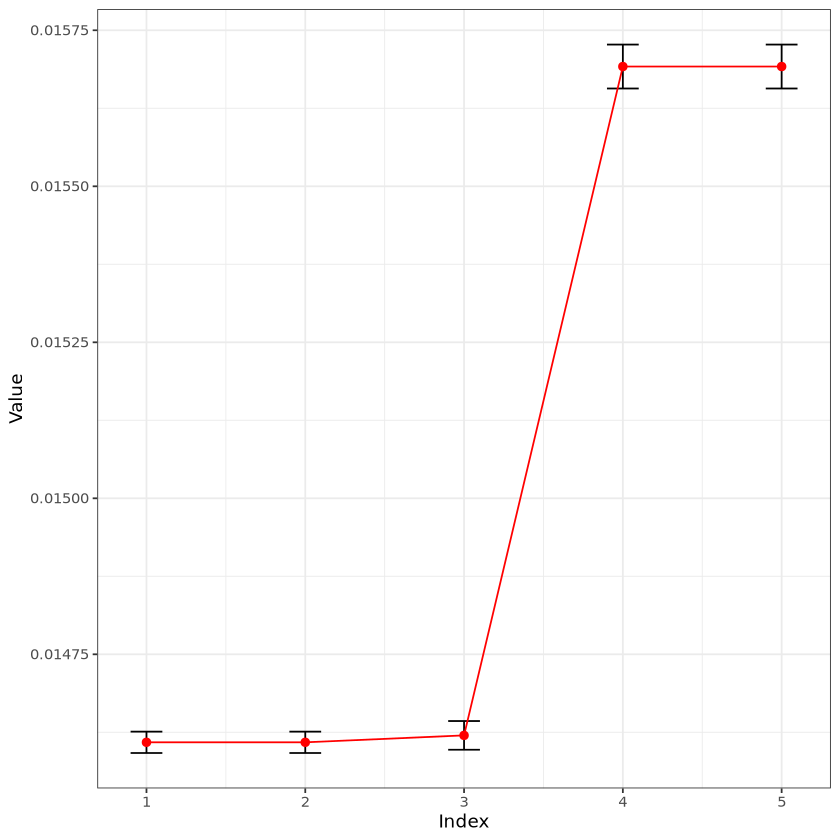

In [69]:
ggplot(ate_vector_hl, aes(x = index, y = ate)) +
  geom_errorbar(aes(ymin = ate - ate_std, ymax = ate + ate_std), width = 0.2) +
  geom_line(colour = "red") +
  geom_point(colour = "red", size = 2) +
  labs(x = "Index", y = "Value")
  #ggsave("ate_vect_hl.pdf")


In [ ]:
###################### Binary variables #############################

In [1]:
###################### Plots #############################